# Проверка гипотез для увеличения выручки интернет-магазина.

### Описание проекта.

В нашем распоряжении список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

В нашем распоряжении :  

файл hypothesis.csv - 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.  

Результаты A/B-теста описаны в файлах orders.csv и visitors.csv.  

Цель исследования :  
Выяснить -какая из гипотез приведет к наибольшему увеличению выручки.  

Ход исследования:  
Данные -в файлах:  

/datasets/hypothesis.csv  
/datasets/orders.csv  
/datasets/visitors.csv  
О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.  

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки данных.    

Таким образом, исследование пройдёт в несколько этапов:  

-Обзор данных.  

-Предобработка данных.  

-Приоритизация гипотез.  

-Анализ A/B-теста, принятие решения по результатам теста и объясните его.

## Загрузим неоходимые библиотеки и сохраним данные в соответствующие переменные

In [1]:
# импортируем нужные нам библтотеки
import pandas as pd
import datetime as dt 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# сохраним данные с гипотезами в переменную 'data' для приоритизации гипотез
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')

# сохраним данные с заказами и посетителями в переменные 'orders' и 'visitors' для анализ A/B-теста
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


## Подготовим данные к анализу

In [3]:
# выводим основную информацию о датафрейме data и проверим на наличие дубликатов
data.info()
print(data)
data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
                                          Hypothesis  Reach  Impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3 

0

In [4]:
# приведем к нижнему регистру названия столбцов
data.columns = data.columns.str.lower()

Данные прочитаны, названия столбцов приведены к нижнему регистру, наличие дубликатов не обнаружено.

In [5]:
# выводим основную информацию о датафрейме orders и проверим на наличие дубликатов
orders.info()
print(orders)
orders.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
      transactionId   visitorId       date  revenue group
0        3667963787  3312258926 2019-08-15     1650     B
1        2804400009  3642806036 2019-08-15      730     B
2        2961555356  4069496402 2019-08-15      400     A
3        3797467345  1196621759 2019-08-15     9759     B
4        2282983706  2322279887 2019-08-15     2308     B
...             ...         ...        ...      ...   ...
1192     2662137336  3733762160 2019-08-14     6490     B
119

0

In [6]:
# выводим основную информацию о датафрейме visitors и проверим на наличие дубликатов
visitors.info()
print(visitors)
visitors.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756
..        ...   ...       ...
57 2019-08-27     B       720
58 2019-08-28     B       654
59 2019-08-29     B       531
60 2019-08-30     B       490
61 2019-08-31     B       718

[62 rows x 3 columns]


0

Данные прочитаны и готовы к анализу, наличие дубликатов не обнаружено.

##  Приоритизация гипотез.

In [7]:
# посчитаем ICE для гипотез, добавим полученные значения ICE к существующей таблице
data['ICE'] = (data['impact']*data['confidence'])/data['efforts']
print(data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


Наиболее перспективные гипотезы по ICE : гипотезы под номерами 0,7,8

In [8]:
# посчитаем RICE для гипотез, добавим полученные значения RICE к существующей таблице
data['RICE'] = (data['reach']*data['impact']*data['confidence'])/data['efforts']
print(data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


На первом месте гипотеза под номером 7

При применении RICE вместо ICE приоритизация гипотез немного изменилась, на первом месте гипотеза под номером 7, так как ее 
параметр RICE равен 10, в то время когда у других гипотез он меньше. 

## Анализ A/B-теста

### Построим график кумулятивной выручки по группам

In [9]:
# изучим данные из файлов с заказами и посетителями
print(orders.head(5))
print(visitors.head(5))

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756


In [10]:
# cоздаем датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders, и удалим дубликаты
datesGroups = orders[['date','group']].drop_duplicates()
print(datesGroups.head(5))

         date group
0  2019-08-15     B
2  2019-08-15     A
45 2019-08-16     A
47 2019-08-16     B
55 2019-08-01     A


In [11]:
# объявляем переменную ordersAggregated, содержащую date, group, transactionId, visitorId, revenue, и отсортируйте по столбцам date, group
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
print(ordersAggregated.head(5))

          date group  transactionId  visitorId  revenue
55  2019-08-01     A             24         20   148579
66  2019-08-01     B             21         20   101217
175 2019-08-02     A             44         38   242401
173 2019-08-02     B             45         43   266748
291 2019-08-03     A             68         62   354874


In [12]:
# объявим переменную visitorsAggregated, содержащую date, group, visitors, , и отсортируйте по столбцам date, group
visitorsAggregated = datesGroups.apply(lambda x: 
visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == 
x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), 
axis=1).sort_values(by=['date','group'])
print(visitorsAggregated.head(5))

          date group  visitors
55  2019-08-01     A       719
66  2019-08-01     B       713
175 2019-08-02     A      1338
173 2019-08-02     B      1294
291 2019-08-03     A      1845


In [13]:
# объединим ordersAggregated и visitorsAggregated, и сохрани в переменную cumulativeData
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [14]:
# назовем столбцы следующими именами
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


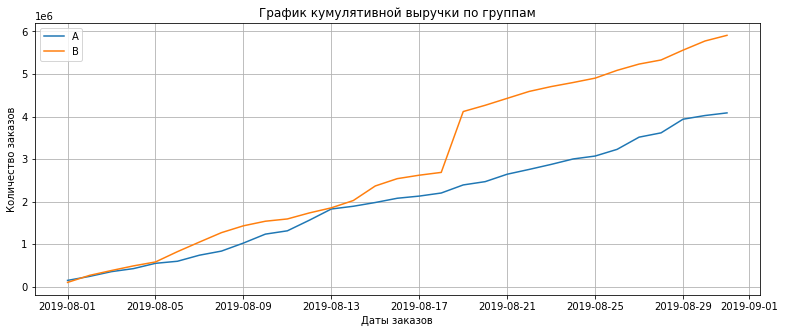

In [15]:
# объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраним данные о датах, выручке и числе заказов в группах A и B.
# построим графики кумулятивной выручки по дням по группам
plt.figure(figsize=(13,5))
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Даты заказов')
plt.ylabel('Количество заказов')
plt.legend()
plt.grid()

Группа B в отличии от A начинает сильно лидировать с середины теста. Возможно с 18 августа по группе B были аномально большие заказы.

### Построим график кумулятивного среднего чека по группам

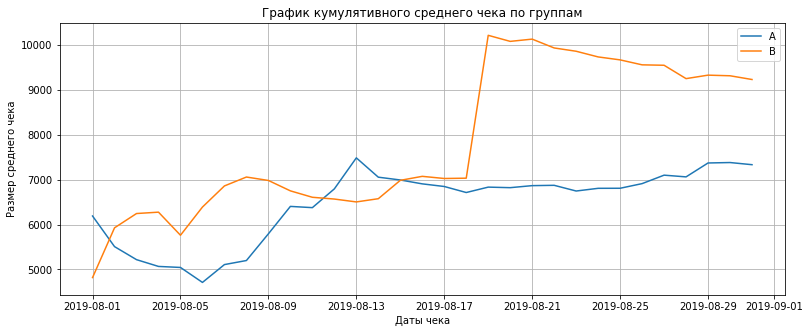

In [16]:
plt.figure(figsize=(13,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Даты чека')
plt.ylabel('Размер среднего чека')
plt.legend()
plt.grid()

Со 2 по 11 августа чек по группе B больше. А с 12 по 14 августа преобладает чек по группе А. 
Сильный скачок среднего чека в группе 'B' скорее всего можно объяснить одним крупным заказом 18-19 августа или в эти дни было очень много заказов.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

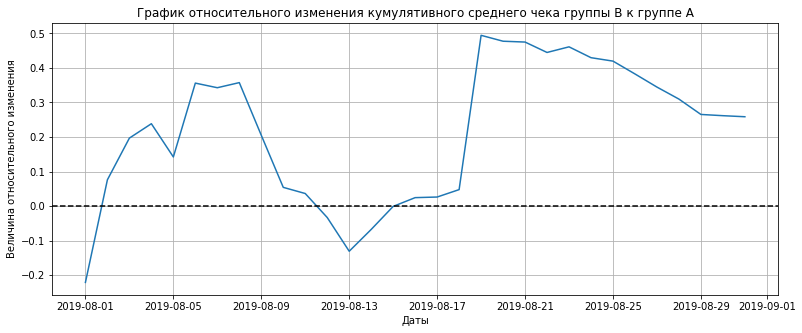

In [17]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', 
suffixes=['A', 'B'])

plt.figure(figsize=(13,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Даты')
plt.ylabel('Величина относительного изменения')
plt.axhline(y=0, color='black', linestyle='--') 
plt.grid()

Результаты теста значительно меняются в несколько дат, возможно в это время были совершены аномальные заказы.
Средний чек B превышает А со 2 августа до 12 августа, далее превышение идет с 15 августа. А в период с 12 по 15 августа средний 
чек группы B ниже чека группы А.

### Построим график кумулятивной конверсии по группам

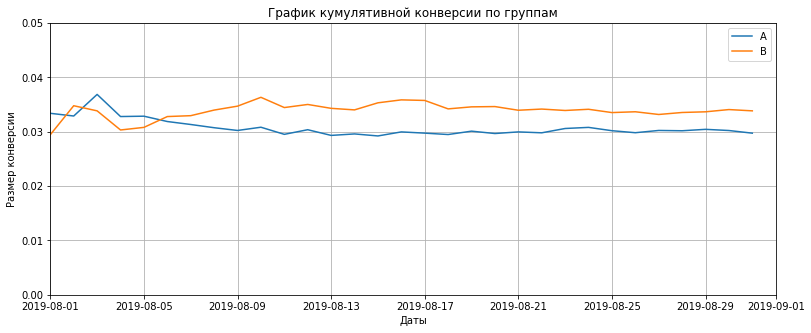

In [18]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(13,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Даты')
plt.ylabel('Размер конверсии')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.grid()

В период с 3 августа по 6 августа группа А имеет большую конверсию. А с 6 августа конверсия группы В лидирует и фиксируется примерно около одного значения, больше значения группы А.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A

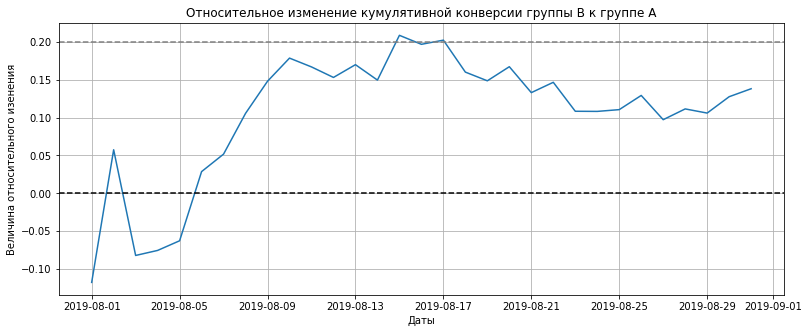

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(13,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.xlabel('Даты')
plt.ylabel('Величина относительного изенения')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.grid()

Резкий скачок конверсии группы В наблюдается 2-го августа. С 3 по 6 августа конверсия группы В ниже группы А. Группа В 
начинает стабильно лидировать по конверсии с 6 августа.

### Построим точечный график количества заказов по пользователям.

In [20]:
# создаем датафрейм c двумя столбцами: 'userId' и 'orders'
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['userId','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


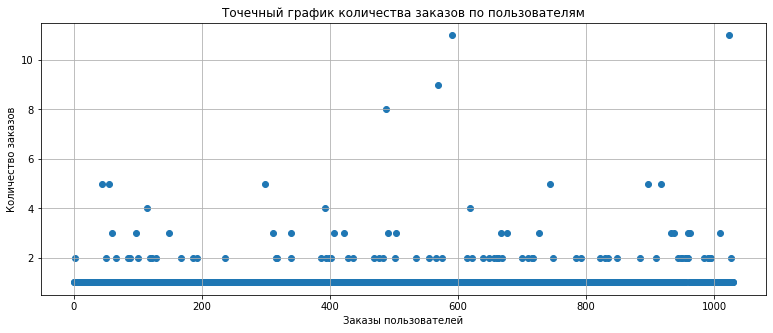

In [21]:
x_values = pd.Series(range(0, len(ordersByUsers)))

x_values = pd.Series(range(0,len(ordersByUsers['orders'])))

plt.figure(figsize=(13,5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Заказы пользователей')
plt.ylabel('Количество заказов')
plt.grid()

Пользователей, которые заказали более 2 раз, мало. Пока не можем сказать - это нормально или нет.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

In [22]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


### Построим точечный график стоимостей заказов.

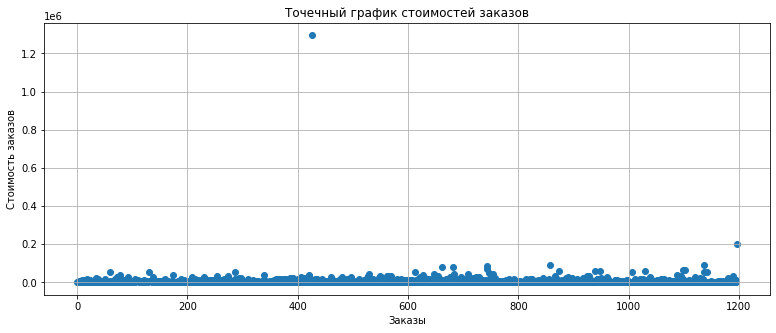

In [23]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(13,5))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов')
plt.grid()

Заказы на 200 тыс.руб и более выглядят весьма аномально.

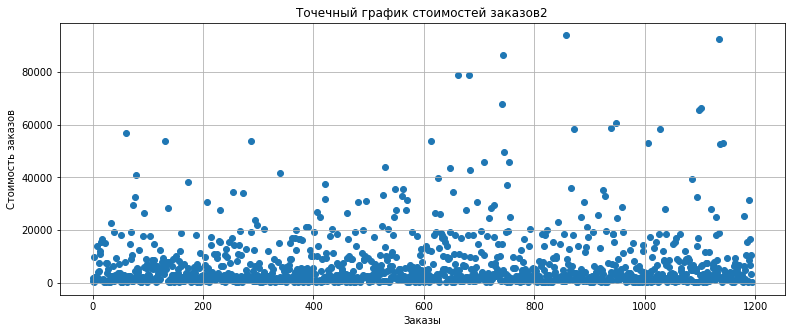

In [24]:
 # если уберем явные выбросы с заказами стоимостью больше 180000, то получим более точный график
orders_rev = orders[orders['revenue']<=180000]['revenue']
x2_values = pd.Series(range(0,len(orders_rev)))
plt.figure(figsize=(13,5))
plt.scatter(x2_values, orders_rev) 
plt.title('Точечный график стоимостей заказов2')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов')
plt.grid()

Из графика видим, что преобладает количество заказов стоимостью до 10 тыс.руб.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [25]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более, чем у 5% заказов чек дороже 28000 рублей. И не больше, чем у 1% - дороже 58233,2 рублей.
Получается, что 99% заказов < 58233.2 рублей, определим данную сумму границей аномалий.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [26]:
# Соберем информацию по заказам и визитам и объеденим в одну таблицу

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Объявим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'], где для пользователей, совершивших хотя 
бы 1 заказ, будет указано число заказов.

In [27]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 




Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя,а 
пользователям без заказов — нули.

Сформулируем нулевую гипотезу - 'статистически значимые различия в конверсии между группами отсутствуют'.
Альтернативная гипотеза будет следующая - 'статистически значимые различия есть'.

Выведем p-value для сравнения среднего между группами.
А также выведем относительное различие в среднем между группами.

In [28]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])) 

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.01679
0.138


P-value = 0.01679, он меньше 0.05, поэтому нулевую гипотезу отвергаем. Относительное различие в конверсии между группами по «сырым» данным составляет 13,8%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Сформулируем нулевую гипотезу - 'статистически значимые различия в средних чеках между группами отсутствуют'.
Альтернативная гипотеза будет следующая - 'статистически значимые различия есть'.

Выведем p-value для сравнения средних чеков между группами.
Так же выведем относительный прирост среднего чека группы B. 

In [29]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


P-value намного больше 0.05, значит нулевую гипотезу не отвергаем. Относительное различие среднего чека между группами 
составляет 26%.

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 58233.2 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию.

In [30]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64


Получили аномальных пользователей. Для подсчета статистичесой значимости необходимо их удалить.

Посчитаем статистическую значимость различия среднего количества заказов после удаления аномальных пользователей.

Сформулируем нулевую гипотезу - 'статистически значимые различия в конверсиях между группами отсутствуют'.
Альтернативная гипотеза будет следующая - 'статистически значимые различия есть'.

Выведите p-value для сравнения среднего между очищенными группами.
Так же выведем относительный прирост среднего очищенной группы B.

In [31]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.01007
0.174


P-value = 0.01, меньше 0.05. Значит, нулевую гипотезу отвергаем, статистически значимые отличия в конверсии между группами существуют.Относительное различие в конверсии между группами составляет 17,4%

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Сформулируем нулевую гипотезу - 'статистически значимые различия в средних чеках между группами отсутствуют'.
Альтернативная гипотеза будет следующая - 'статистически значимые различия есть'.

Выведем p-value для сравнения средних чеков между очищенными группами.
Так же выведем относительный прирост среднего чека очищенной группы B.

In [32]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.798
-0.020


P-value = 0.798 что намного больше 0.05. Значит, нулевую гипотезу не отвергаем. Средний чек группы B меньше среднего чека группы A ( на 2%).

### Принятие решения.

Различие по конверсии между группами А и В как по «сырым» данным, так и после фильтрации аномалий есть.
Относительное различие в конверсии между группами по «сырым» данным составляет 13,8%. Относительное различие в конверсии между группами по «очищенным» данным составляет 17,4%.

Относительное различие среднего чека между группами по «сырым» данным составляет 26%. А средний чек группы B после удаления аномальных выбросов оказался меньше группы A на 2%. В итоге различия незначительные.

Из графика различия конверсии между группами видим, что результаты группы B лучше группы A: группа В стабильно лидирует по конверсии с 6 августа.
График различия среднего чека колеблется из-за аномалий.

В итоге можем принять решение - остановить тест, зафиксировать победу одной группы, этой группой будет В.